Credits: Forked from [deep-learning-keras-tensorflow](https://github.com/leriomaggio/deep-learning-keras-tensorflow) by Valerio Maggio

# Unsupervised learning

### AutoEncoders  

An autoencoder, is an artificial neural network used for learning efficient codings. 

The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. 

<img src ="imgs/autoencoder.png" width="25%">

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

In [4]:
# based on: https://blog.keras.io/building-autoencoders-in-keras.html

encoding_dim = 32  
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#note: x_train, x_train :) 
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 20s - loss: 0.3832 - val_loss: 0.2730
Epoch 2/50
60000/60000 [==============================] - 19s - loss: 0.2660 - val_loss: 0.2557
Epoch 3/50
60000/60000 [==============================] - 18s - loss: 0.2455 - val_loss: 0.2331
Epoch 4/50
60000/60000 [==============================] - 19s - loss: 0.2254 - val_loss: 0.2152
Epoch 5/50
60000/60000 [==============================] - 19s - loss: 0.2099 - val_loss: 0.2018
Epoch 6/50
60000/60000 [==============================] - 19s - loss: 0.1982 - val_loss: 0.1917
Epoch 7/50
60000/60000 [==============================] - 19s - loss: 0.1893 - val_loss: 0.1840
Epoch 8/50
60000/60000 [==============================] - 19s - loss: 0.1824 - val_loss: 0.1778
Epoch 9/50
60000/60000 [==============================] - 19s - loss: 0.1766 - val_loss: 0.1725
Epoch 10/50
60000/60000 [==============================] - 19s - loss: 0.1715 - val_lo

#### Testing the Autoencoder 

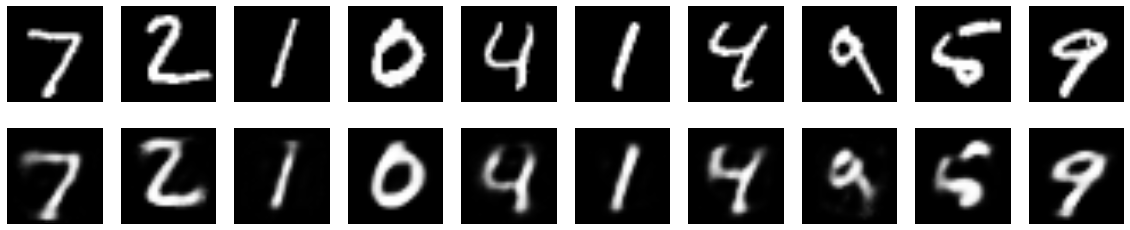

In [5]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Sample generation with Autoencoder 

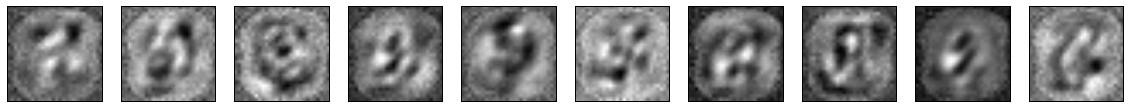

In [14]:
encoded_imgs = np.random.rand(10,32)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # generation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Pretraining encoders 

One of the powerful tools of auto-encoders is using the encoder to generate meaningful representation from the feature vectors.

In [1]:
# Use the encoder to pretrain a classifier 

---

# Natural Language Processing using Artificial Neural Networks

> “In God we trust. All others must bring data.” – W. Edwards Deming, statistician

# Word Embeddings

### What?
Convert words to vectors in a high dimensional space. Each dimension denotes an aspect like gender, type of object / word.

"Word embeddings" are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words. The geometric space formed by these vectors is called an embedding space.



### Why?
By converting words to vectors we build relations between words. More similar the words in a dimension, more closer their scores are.

### Example
_W(green) = (1.2, 0.98, 0.05, ...)_

_W(red) = (1.1, 0.2, 0.5, ...)_

Here the vector values of _green_ and _red_ are very similar in one dimension because they both are colours. The value for second dimension is very different because red might be depicting something negative in the training data while green is used for positiveness.

By vectorizing we are indirectly building different kind of relations between words.

## Example of `word2vec` using gensim

In [1]:
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

Using gpu device 0: GeForce GTX 760 (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 4007)


### Reading blog post from data directory

In [2]:
import os
import pickle

In [3]:
DATA_DIRECTORY = os.path.join(os.path.abspath(os.path.curdir), 'data')

In [4]:
male_posts = []
female_post = []

In [5]:
with open(os.path.join(DATA_DIRECTORY,"male_blog_list.txt"),"rb") as male_file:
    male_posts= pickle.load(male_file)
    
with open(os.path.join(DATA_DIRECTORY,"female_blog_list.txt"),"rb") as female_file:
    female_posts = pickle.load(female_file)

In [6]:
print(len(female_posts))
print(len(male_posts))

2252
2611


In [7]:
filtered_male_posts = list(filter(lambda p: len(p) > 0, male_posts))
filtered_female_posts = list(filter(lambda p: len(p) > 0, female_posts))
posts = filtered_female_posts + filtered_male_posts

In [8]:
print(len(filtered_female_posts), len(filtered_male_posts), len(posts))

2247 2595 4842


## Word2Vec

In [9]:
w2v = Word2Vec(size=200, min_count=1)
w2v.build_vocab(map(lambda x: x.split(), posts[:100]), )

In [10]:
w2v.vocab

{'see.': <gensim.models.word2vec.Vocab at 0x7f61aa4f1908>,
 'never.': <gensim.models.word2vec.Vocab at 0x7f61aa4f1dd8>,
 'driving': <gensim.models.word2vec.Vocab at 0x7f61aa4f1e48>,
 'buddy': <gensim.models.word2vec.Vocab at 0x7f61aa4f0240>,
 'DEFENSE': <gensim.models.word2vec.Vocab at 0x7f61aa4f0438>,
 'interval': <gensim.models.word2vec.Vocab at 0x7f61aa4f04e0>,
 'Right': <gensim.models.word2vec.Vocab at 0x7f61aa4f06a0>,
 'minds,': <gensim.models.word2vec.Vocab at 0x7f61aa4f06d8>,
 'earth.': <gensim.models.word2vec.Vocab at 0x7f61aa4f0710>,
 'pleasure': <gensim.models.word2vec.Vocab at 0x7f61aa4f08d0>,
 'school,': <gensim.models.word2vec.Vocab at 0x7f61aa4f0cc0>,
 'someone': <gensim.models.word2vec.Vocab at 0x7f61aa4f0ef0>,
 'dangit...': <gensim.models.word2vec.Vocab at 0x7f61aa4f23c8>,
 'one!': <gensim.models.word2vec.Vocab at 0x7f61aa4f2c88>,
 'hard.': <gensim.models.word2vec.Vocab at 0x7f61aa4e25c0>,
 'programs,': <gensim.models.word2vec.Vocab at 0x7f61aa4e27b8>,
 'SEEEENNNIIIOOOR

In [11]:
w2v.similarity('I', 'My')

0.082851942583535218

In [12]:
print(posts[5])
w2v.similarity('ring', 'husband')

I've tried starting blog after blog and it just never feels right.  Then I read today that it feels strange to most people, but the more you do it the better it gets (hmm, sounds suspiciously like something else!) so I decided to give it another try.    My husband bought me a notepad at  urlLink McNally  (the best bookstore in Western Canada) with that title and a picture of a 50s housewife grinning desperately.  Each page has something funny like "New curtains!  Hurrah!".  For some reason it struck me as absolutely hilarious and has stuck in my head ever since.  What were those women thinking?


0.037229111896779618

In [15]:
w2v.similarity('ring', 'housewife')

0.11547398696865138

In [16]:
w2v.similarity('women', 'housewife')  # Diversity friendly

-0.14627530812290576

## Doc2Vec

The same technique of word2vec is extrapolated to documents. Here, we do everything done in word2vec + we vectorize the documents too

In [17]:
import numpy as np

In [18]:
# 0 for male, 1 for female
y_posts = np.concatenate((np.zeros(len(filtered_male_posts)),
                          np.ones(len(filtered_female_posts))))

In [19]:
len(y_posts)

4842

# Convolutional Neural Networks for Sentence Classification

Train convolutional network for sentiment analysis. Based on
"Convolutional Neural Networks for Sentence Classification" by Yoon Kim
http://arxiv.org/pdf/1408.5882v2.pdf

For 'CNN-non-static' gets to 82.1% after 61 epochs with following settings:
embedding_dim = 20          
filter_sizes = (3, 4)
num_filters = 3
dropout_prob = (0.7, 0.8)
hidden_dims = 100

For 'CNN-rand' gets to 78-79% after 7-8 epochs with following settings:
embedding_dim = 20          
filter_sizes = (3, 4)
num_filters = 150
dropout_prob = (0.25, 0.5)
hidden_dims = 150

For 'CNN-static' gets to 75.4% after 7 epochs with following settings:
embedding_dim = 100          
filter_sizes = (3, 4)
num_filters = 150
dropout_prob = (0.25, 0.5)
hidden_dims = 150

* it turns out that such a small data set as "Movie reviews with one
sentence per review"  (Pang and Lee, 2005) requires much smaller network
than the one introduced in the original article:
- embedding dimension is only 20 (instead of 300; 'CNN-static' still requires ~100)
- 2 filter sizes (instead of 3)
- higher dropout probabilities and
- 3 filters per filter size is enough for 'CNN-non-static' (instead of 100)
- embedding initialization does not require prebuilt Google Word2Vec data.
Training Word2Vec on the same "Movie reviews" data set is enough to 
achieve performance reported in the article (81.6%)

** Another distinct difference is slidind MaxPooling window of length=2
instead of MaxPooling over whole feature map as in the article

In [7]:
import numpy as np
import data_helpers
from w2v import train_word2vec

from keras.models import Sequential, Model
from keras.layers import (Activation, Dense, Dropout, Embedding, 
                          Flatten, Input, Merge, 
                          Convolution1D, MaxPooling1D)

np.random.seed(2)

Using gpu device 0: GeForce GTX 760 (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 4007)
Using Theano backend.


### Parameters

Model Variations. See Kim Yoon's Convolutional Neural Networks for 
Sentence Classification, Section 3 for detail.

In [1]:
model_variation = 'CNN-rand'  #  CNN-rand | CNN-non-static | CNN-static
print('Model variation is %s' % model_variation)

Model variation is CNN-rand


In [2]:
# Model Hyperparameters
sequence_length = 56
embedding_dim = 20          
filter_sizes = (3, 4)
num_filters = 150
dropout_prob = (0.25, 0.5)
hidden_dims = 150

In [3]:
# Training parameters
batch_size = 32
num_epochs = 100
val_split = 0.1

In [4]:
# Word2Vec parameters, see train_word2vec
min_word_count = 1  # Minimum word count                        
context = 10        # Context window size    

### Data Preparation 

In [8]:
# Load data
print("Loading data...")
x, y, vocabulary, vocabulary_inv = data_helpers.load_data()

if model_variation=='CNN-non-static' or model_variation=='CNN-static':
    embedding_weights = train_word2vec(x, vocabulary_inv, 
                                       embedding_dim, min_word_count, 
                                       context)
    if model_variation=='CNN-static':
        x = embedding_weights[0][x]
elif model_variation=='CNN-rand':
    embedding_weights = None
else:
    raise ValueError('Unknown model variation')    

Loading data...


In [9]:
# Shuffle data
shuffle_indices = np.random.permutation(np.arange(len(y)))
x_shuffled = x[shuffle_indices]
y_shuffled = y[shuffle_indices].argmax(axis=1)

In [10]:
print("Vocabulary Size: {:d}".format(len(vocabulary)))

Vocabulary Size: 18765


### Building CNN Model

In [11]:
graph_in = Input(shape=(sequence_length, embedding_dim))
convs = []
for fsz in filter_sizes:
    conv = Convolution1D(nb_filter=num_filters,
                         filter_length=fsz,
                         border_mode='valid',
                         activation='relu',
                         subsample_length=1)(graph_in)
    pool = MaxPooling1D(pool_length=2)(conv)
    flatten = Flatten()(pool)
    convs.append(flatten)
    
if len(filter_sizes)>1:
    out = Merge(mode='concat')(convs)
else:
    out = convs[0]

graph = Model(input=graph_in, output=out)

# main sequential model
model = Sequential()
if not model_variation=='CNN-static':
    model.add(Embedding(len(vocabulary), embedding_dim, input_length=sequence_length,
                        weights=embedding_weights))
model.add(Dropout(dropout_prob[0], input_shape=(sequence_length, embedding_dim)))
model.add(graph)
model.add(Dense(hidden_dims))
model.add(Dropout(dropout_prob[1]))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# Training model
# ==================================================
model.fit(x_shuffled, y_shuffled, batch_size=batch_size,
          nb_epoch=num_epochs, validation_split=val_split, verbose=2)

Train on 9595 samples, validate on 1067 samples
Epoch 1/100
1s - loss: 0.6516 - acc: 0.6005 - val_loss: 0.5692 - val_acc: 0.7151
Epoch 2/100
1s - loss: 0.4556 - acc: 0.7896 - val_loss: 0.5154 - val_acc: 0.7573
Epoch 3/100
1s - loss: 0.3556 - acc: 0.8532 - val_loss: 0.5050 - val_acc: 0.7816
Epoch 4/100
1s - loss: 0.2978 - acc: 0.8779 - val_loss: 0.5335 - val_acc: 0.7901
Epoch 5/100
1s - loss: 0.2599 - acc: 0.8972 - val_loss: 0.5592 - val_acc: 0.7769
Epoch 6/100
1s - loss: 0.2248 - acc: 0.9112 - val_loss: 0.5559 - val_acc: 0.7685
Epoch 7/100
1s - loss: 0.1994 - acc: 0.9219 - val_loss: 0.5760 - val_acc: 0.7704
Epoch 8/100
1s - loss: 0.1801 - acc: 0.9326 - val_loss: 0.6014 - val_acc: 0.7788
Epoch 9/100
1s - loss: 0.1472 - acc: 0.9449 - val_loss: 0.6637 - val_acc: 0.7751
Epoch 10/100
1s - loss: 0.1269 - acc: 0.9537 - val_loss: 0.7281 - val_acc: 0.7563
Epoch 11/100
1s - loss: 0.1123 - acc: 0.9592 - val_loss: 0.7452 - val_acc: 0.7788
Epoch 12/100
1s - loss: 0.0897 - acc: 0.9658 - val_loss: 0.

# Another Example

Using Keras + [**GloVe**](http://nlp.stanford.edu/projects/glove/) - **Global Vectors for Word Representation**

## Using pre-trained word embeddings in a Keras model

**Reference:** [https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html]()